# GEONE - Images and point sets

In geone:

- an *image* consists in a grid with variable(s) (or attribute(s) or property(ies)) having values attached to each grid cell
- a *point set* consists in variables having values attached to points located in space.

This notebook introduces 

- the class `geone.img.Img` to store an image and the class `geone.img.PointSet` to store a point set
- functions to load / save images and point sets from / to "standard" ascii files
- functions for plotting images and point sets (in 2D and 3D)

## Import what is required

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import os

# import package 'geone'
import geone as gn

In [2]:
# Show version of python and version of geone
import sys 
print(sys.version_info)
print('geone version: ' + gn.__version__)

sys.version_info(major=3, minor=11, micro=5, releaselevel='final', serial=0)
geone version: 1.2.9


### Remark
The matplotlib figures can be visualized in *interactive* mode:

- `%matplotlib notebook`: enable interactive mode
- `%matplotlib inline`: disable interactive mode

## 1. Image: the class `geone.img.Img`

The class `geone.img.Img` allows to store variables defined in a regular grid. The attributes of this class are:

- `nx`, `ny`, `nz`: the number of cells in the grid along each axis,
- `sx`, `sy`, `sz`: the cell size along each axis,
- `ox`, `oy`, `oz`: the coordinates of the origin: the **corner** (not the center) of the first grid cell (i.e. the "bottom-lower-left" grid cell)
- `nv`: the number of variable(s) (property(ies)) 
- `val`: a `(nv, nz, ny, nx)`-array containing the values of the variable(s) attached to the grid cell, with:
    - `val[iv, iz, iy, ix]`: the value of the variable of index `iv` in the grid cell of index `ix`, `iy`, `iz` along $x$, $y$, $z$-axis respectively.
- `varname`: a list of length `nv` containing the name of the variable(s)

**Remark.** Specification of the grid geometry is given in 3D, even for "2D images" (`nz=1`).

### Defining an image (instantiation)
Define an image with one variable named 'cell_index' being the grid cell index (single index).

In [3]:
nx, ny, nz = 5, 4, 3 # number of cells along each axis
im = gn.img.Img(nx=nx, ny=ny, nz=nz, 
                # sx=1.0, sy=1.0, sz=1.0, # default values
                # ox=1.0, oy=1.0, oz=1.0, # default values
                nv=1, varname='cell_index', val=np.arange(nx*ny*nz))
im

*** Img object ***
name = ''
(nx, ny, nz) = (5, 4, 3) # number of cells along each axis
(sx, sy, sz) = (1.0, 1.0, 1.0) # cell size (spacing) along each axis
(ox, oy, oz) = (0.0, 0.0, 0.0) # origin (coordinates of bottom-lower-left corner)
nv = 1  # number of variable(s)
varname = ['cell_index']
val: (1, 3, 4, 5)-array
*****

The array given for the keyword argument `val` must have a size equal to the number of grid cells (multiplied by the number of given variable `nv`). This array is reshaped if needed; what is important to know is that the grid cells are filled with:

- first $x$ index increases, then $y$ index increases, then $z$ index increases.

In [4]:
im.val

array([[[[ 0.,  1.,  2.,  3.,  4.],
         [ 5.,  6.,  7.,  8.,  9.],
         [10., 11., 12., 13., 14.],
         [15., 16., 17., 18., 19.]],

        [[20., 21., 22., 23., 24.],
         [25., 26., 27., 28., 29.],
         [30., 31., 32., 33., 34.],
         [35., 36., 37., 38., 39.]],

        [[40., 41., 42., 43., 44.],
         [45., 46., 47., 48., 49.],
         [50., 51., 52., 53., 54.],
         [55., 56., 57., 58., 59.]]]])

### Adding a variable in an image
The methods `insert_var` and `append_var` allow to add one (or several) variable(s) into an image.

In [5]:
v = 100 + np.arange(nx*ny*nz)
im.append_var(val=v, varname='new_var') # or equiv.: im.insert_var(val=v, varname='new_var', ind=im.nv)
im

*** Img object ***
name = ''
(nx, ny, nz) = (5, 4, 3) # number of cells along each axis
(sx, sy, sz) = (1.0, 1.0, 1.0) # cell size (spacing) along each axis
(ox, oy, oz) = (0.0, 0.0, 0.0) # origin (coordinates of bottom-lower-left corner)
nv = 2  # number of variable(s)
varname = ['cell_index', 'new_var']
val: (2, 3, 4, 5)-array
*****

In [6]:
im.val

array([[[[  0.,   1.,   2.,   3.,   4.],
         [  5.,   6.,   7.,   8.,   9.],
         [ 10.,  11.,  12.,  13.,  14.],
         [ 15.,  16.,  17.,  18.,  19.]],

        [[ 20.,  21.,  22.,  23.,  24.],
         [ 25.,  26.,  27.,  28.,  29.],
         [ 30.,  31.,  32.,  33.,  34.],
         [ 35.,  36.,  37.,  38.,  39.]],

        [[ 40.,  41.,  42.,  43.,  44.],
         [ 45.,  46.,  47.,  48.,  49.],
         [ 50.,  51.,  52.,  53.,  54.],
         [ 55.,  56.,  57.,  58.,  59.]]],


       [[[100., 101., 102., 103., 104.],
         [105., 106., 107., 108., 109.],
         [110., 111., 112., 113., 114.],
         [115., 116., 117., 118., 119.]],

        [[120., 121., 122., 123., 124.],
         [125., 126., 127., 128., 129.],
         [130., 131., 132., 133., 134.],
         [135., 136., 137., 138., 139.]],

        [[140., 141., 142., 143., 144.],
         [145., 146., 147., 148., 149.],
         [150., 151., 152., 153., 154.],
         [155., 156., 157., 158., 159.]]]])

### Starting from an "empty grid"
The image im above can be set by starting with an "empty grid", i.e. an image with no variable, and then by adding the variables.

In [7]:
nx, ny, nz = 5, 4, 3 # number of cells along each axis
im = gn.img.Img(nx=nx, ny=ny, nz=nz
                # sx=1.0, sy=1.0, sz=1.0, # default values
                # ox=1.0, oy=1.0, oz=1.0, # default values
                # nv=0                    # default value
               )
im

*** Img object ***
name = ''
(nx, ny, nz) = (5, 4, 3) # number of cells along each axis
(sx, sy, sz) = (1.0, 1.0, 1.0) # cell size (spacing) along each axis
(ox, oy, oz) = (0.0, 0.0, 0.0) # origin (coordinates of bottom-lower-left corner)
nv = 0  # number of variable(s)
varname = []
val: (0, 3, 4, 5)-array
*****

In [8]:
im.append_var(val=np.arange(nx*ny*nz), varname='cell_index')
im.append_var(val=v, varname='new_var')
im

*** Img object ***
name = ''
(nx, ny, nz) = (5, 4, 3) # number of cells along each axis
(sx, sy, sz) = (1.0, 1.0, 1.0) # cell size (spacing) along each axis
(ox, oy, oz) = (0.0, 0.0, 0.0) # origin (coordinates of bottom-lower-left corner)
nv = 2  # number of variable(s)
varname = ['cell_index', 'new_var']
val: (2, 3, 4, 5)-array
*****

## 2. Point set: the class `geone.img.PointSet`

The class `geone.img.PointSet` allows to store variables defined on points located in space. The attributes of this class are:

- `npt`: the number of points
- `nv`: the number of variable(s) (propertie(s)), including $x$, $y$, $z$ coordinates
- `val`: a `(nv, npt)`-array containing the values of the variable(s), `val[i, j]` being the value of the variable of index `i` for the point `j`.
- `varname`: a list of length `nv` containing the name of the variable(s)

Although not mandatory, the first three variables are typically used to store the $x$, $y$, $z$ coordinates locating the point (in particular `nv` $\geqslant$ 3):

- (`val[0, j]`, `val[1, j]`, `val[2, j]`) is the location of the point `j`
- `varname[0]` = 'X', `varname[1]` = 'Y', `varname[2]` = 'Z'

### Defining a point set (instantiation)
Define a image with 7 points and 4 variables, the first three ones being the $x$, $y$, $z$ coordinates of the points and the fourth variable a code named 'code'.

In [9]:
npt = 7  # number of points
nv = 4   # number of variables including x, y, z coordinates
varname = ['x', 'y', 'z', 'code'] # list of variable names
val = np.array([
    [10.5, 20.5, 0.0, 2], # x, y, z, code: 1st point (point of index 0)
    [14.5, 21.5, 0.0, 2], # x, y, z, code: 2nd point (point of index 1)
    [60.5, 32.5, 0.0, 1],
    [45.5, 55.5, 0.0, 0],
    [17.5, 75.5, 0.0, 1],
    [52.5, 80.5, 0.0, 0],
    [45.5, 97.5, 0.0, 0]
    ]).T # variable values: (nv, npt)-array

ps = gn.img.PointSet(npt=npt, nv=nv, varname=varname, val=val)
ps

*** PointSet object ***
name = ''
npt = 7 # number of point(s)
nv = 4  # number of variable(s) (including coordinates)
varname = ['x', 'y', 'z', 'code']
val: (4, 7)-array
*****

In [10]:
ps.val

array([[10.5, 14.5, 60.5, 45.5, 17.5, 52.5, 45.5],
       [20.5, 21.5, 32.5, 55.5, 75.5, 80.5, 97.5],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 2. ,  2. ,  1. ,  0. ,  1. ,  0. ,  0. ]])

## 3. Reading / writing variables from / in text (ASCII) files
A common format of text (ASCII) file to store `n` entries of `nv` variables, which can be open as a spreadsheet, is the following:
```
# commented line ...
# [...]
varname[0] varname[1] ... varname[nv-1]
v[0, 0]    v[0, 1]    ... v[0, nv-1]
v[1, 0]    v[1, 1]    ... v[1, nv-1]
...
v[n-1, 0]  v[n-1, 1]  ... v[n-1, nv-1]
```
where `varname[j]` (string) is a the name of the variable of index `j`, and
`v[i, j]` (float) is the value of the variable of index `j`, for the entry of 
index `i`. That is, one entry per line and one variable per column.

The lines beginning with the characters '#' are comments and they form the header. Then, on the first non-commented line, the names of the variables are written, and on the next lines, the values. The names and values are separated with at least one blank space.

**Remark.** Other strings may be used as identifier of comments, and as delimiter.

The function `gn.img.readVarsTxt` allows to read variables from a file (in the format above), whereas the function `gn.img.writeVarsTxt` allows to write variables in a file (same format).

### Example
Write the variables from the point set above into a file using `gn.img.writeVarsTxt`, then read the file using `gn.img.readVarsTxt`.

In [11]:
# Set output directory for generated files
out_dir = 'out'

if not os.path.isdir(out_dir):
    os.mkdir(out_dir)

In [12]:
varname = ps.varname # variable name (list)
v = ps.val.T         # 2d-array of values with one variable per column
varname, v

(['x', 'y', 'z', 'code'],
 array([[10.5, 20.5,  0. ,  2. ],
        [14.5, 21.5,  0. ,  2. ],
        [60.5, 32.5,  0. ,  1. ],
        [45.5, 55.5,  0. ,  0. ],
        [17.5, 75.5,  0. ,  1. ],
        [52.5, 80.5,  0. ,  0. ],
        [45.5, 97.5,  0. ,  0. ]]))

In [13]:
# Write the variables above except column of index 3 (var. z) in a file
filename = os.path.join(out_dir, 'example_vars.txt')
gn.img.writeVarsTxt(filename, varname, v, usecols=(0, 1, 3)) # usecols: specifying column/var. index to save

In [14]:
# Read the file (columns to read can also be specified with keyword arguments usecols)
varname, v = gn.img.readVarsTxt(filename)
varname, v

(['x', 'y', 'code'],
 array([[10.5, 20.5,  2. ],
        [14.5, 21.5,  2. ],
        [60.5, 32.5,  1. ],
        [45.5, 55.5,  0. ],
        [17.5, 75.5,  1. ],
        [52.5, 80.5,  0. ],
        [45.5, 97.5,  0. ]]))

## 4. Reading / writing an image from / to a text file
The file format described above is used to store the variables of an image (i.e. attached to a regular grid).

Notes:

- the number of entries, i.e. number of values per variable must match the number of grid cells,
- the grid geometry and the way to fill the grid are not explicitly given, but the header (commented lines) may be used for that.

The function `gn.img.readImageTxt` reads a text file in the format above and returns an image (instance of the class `geone.img.Img`). This function retrieves, if present, the grid geometry and the sorting mode (to fill the grid) from the header, where key words (identifiers) preceeds the given information as follows:
```
# NX <int>
# NY <int>
# NZ <int>
# SX <float>
# SY <float>
# SZ <float>
# OX <float>
# OY <float>
# OZ <float>
# SORTING +X+Y+Z
```
If not present, the default values passed as keyword arguments to the function are used. Hence, even if the grid geometry and sorting mode information is not written in the header of the file, this function can be used.

**Note:** sorting mode is a string of 6 characters that specifies in which order the axis index varies and in which direction (to fill the grid), e.g. '+X+Y+Z' (default, as when inserting / appending a variable in an image), means that the grid cells are filled with: first $x$ index increases, then $y$ index increases, then $z$ index increases.

The function `gn.img.writeImageTxt` writes a text file, with the grid geometry and sorting mode information in the header. 

Moreover, the variables to be read / written can be specified by passing a tuple of the variable / column indexes with the keyword arguments `usevars`.

### Example
Read the image from the file 'ti.txt' in the directory 'data'. The grid geometry and sorting mode information are retrieved from the header.

In [15]:
data_dir = 'data'
filename = os.path.join(data_dir, 'ti.txt')
im = gn.img.readImageTxt(filename)
im

*** Img object ***
name = 'data/ti.txt'
(nx, ny, nz) = (300, 250, 1) # number of cells along each axis
(sx, sy, sz) = (1.0, 1.0, 1.0) # cell size (spacing) along each axis
(ox, oy, oz) = (0.0, 0.0, 0.0) # origin (coordinates of bottom-lower-left corner)
nv = 1  # number of variable(s)
varname = ['code']
val: (1, 1, 250, 300)-array
*****

**Remark.** If the header of the file did not contain grid geometry and sorting information, the image could be read with
```
im = gn.img.readImageTxt(filename, nx=300, ny=250)
```
The default values of the keyword arguments are used for the rest of the grid definition (`nz=1,`, `sx=1.0`, `sy=1.0`, `sz=1.0`, `ox=0.0`, `oy=0.0`, `oz=0.0`) and the sorting mode (`sorting='+X+Y+Z'`).

## 5. Reading / writing a point set from / to a text file
The file format described above for storing variables is used to store the variables of a point set. The header is not employed.

The function `gn.img.readPointSetTxt` reads the file and returns a point set (instance of the class `geone.img.PointSet`). The coordinates of the points should be set as variables in the file, with variable name 'x', 'y' and 'z' (case insensitive). With the keyword argument `set_xyz_as_first_vars=True` (default): if a coordinate is not present in the file, it is added as a variable in the output point set and set to 0.0 (default value) for all points; moreover, the $x$, $y$, $z$ coordinates are set as variables of index 0, 1, 2 respectively, by reordering the variables if needed.

### Example
Read point set from the file 'hd.txt' (no header) in the directory 'data'. The $z$ coordinate is automatically added. (The same point set as above is then defined.)

In [16]:
data_dir = 'data'
filename = os.path.join(data_dir, 'hd.txt')
ps = gn.img.readPointSetTxt(filename)
ps, ps.val

(*** PointSet object ***
 name = ''
 npt = 7 # number of point(s)
 nv = 4  # number of variable(s) (including coordinates)
 varname = ['X', 'Y', 'Z', 'code']
 val: (4, 7)-array
 *****,
 array([[10.5, 14.5, 60.5, 45.5, 17.5, 52.5, 45.5],
        [20.5, 21.5, 32.5, 55.5, 75.5, 80.5, 97.5],
        [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
        [ 2. ,  2. ,  1. ,  0. ,  1. ,  0. ,  0. ]]))

## 6. Missing value
A variable can contain missing values. Such values ared coded with `nan`. The string 'nan' in a file stands for a missing value. Additionally, if a specific value is used in the file to identify missing values, this specific value can be passed to the functions above for reading / writing through the keyword argument `missing_value`. Then, when reading: the specified value will be replaced by `nan` (before returning), and when writing: `nan` will be replaced by the specified value (before writing the file).

## 7. Plotting an image in 2D: function `geone.imgplot.drawImage2D`

The function `geone.imgplot.drawImage2D` can be used to plot in 2D a variable in an image. 

The plot corresponds to a *slice* in the 3D image grid, where the slice index in the given direction (i.e. the cell index in the given direction) is fixed, via the keyword argument `ix` or `iy` or `iz`. By default, `ix=None`, `iy=None`, `iz=None`, and in this situation the slice `iz=0` is considered.

The index of the variable to plot is given via the keyword argument `iv`, by default `iv=None` implying that `iv=0` is considered if the image contains at least one variable, otherwise an "empty grid" is plotted. To plot an "empty grid" from an image containing one variable (or more), use the keyword argument `plot_empty_grid=True`.

The function is based on the function `matplotlib.pyplot.imshow`, but integrates automatically the grid geometry information for the plot and provides many options. Some of them are illustrated below.

### Example
Plot the image that has been loaded above.

In [17]:
# already done above 
data_dir = 'data'
filename = os.path.join(data_dir, 'ti.txt')
im = gn.img.readImageTxt(filename)

In [18]:
# Get the values taken by all the variables in the image
im.get_unique()

array([0., 1., 2.])

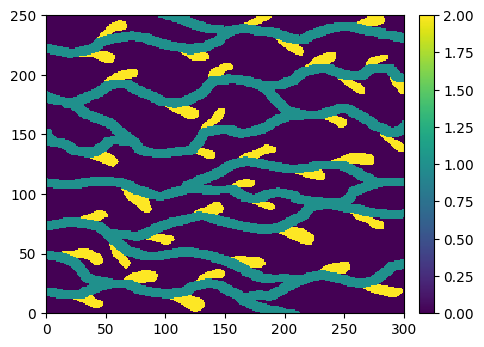

In [19]:
plt.figure(figsize=(5,5))
gn.imgplot.drawImage2D(im)
plt.show()

### Colors
A default continuous color bar is used with the minimal and maximal value computed from the plotted values.
The color bar, the min. and max. values can be specified via the keyword argument `cmap`, `vmin` et `vmax`.

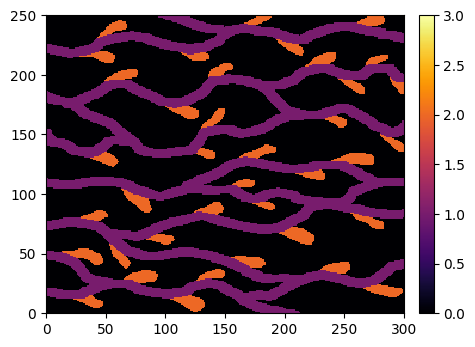

In [20]:
plt.figure(figsize=(5,5))
gn.imgplot.drawImage2D(im, cmap='inferno', vmin=0., vmax=3.)
plt.show()

### Colors for categorical variable
If the plotted variable is categorical, i.e. takes discrete values (in a limited ensemble), the color bar can be adapted to better display each category. For that, use the keyword argument `categ=True`.

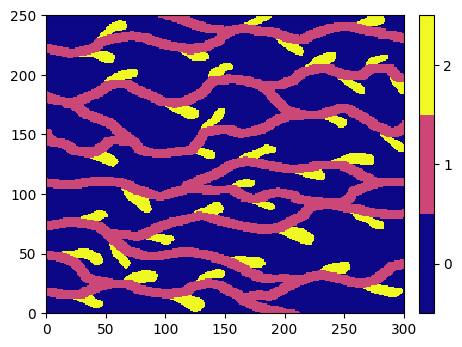

In [21]:
plt.figure(figsize=(5,5))
gn.imgplot.drawImage2D(im, categ=True, cmap='plasma')
plt.show()

The colors used are defined from the underlying color map. However, the color used for each category may be specified via the keyword argument `categCol`.

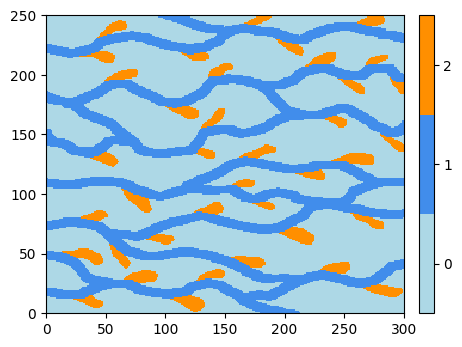

In [22]:
col = ['lightblue', [x/255. for x in ( 65, 141, 235)], '#ff8f00']

plt.figure(figsize=(5,5))
gn.imgplot.drawImage2D(im, categ=True, categCol=col)
plt.show()

The category values used in the color bar may be specified via the keyword argument `categVal`. This can be useful if a category value not present in the variable values has to be displayed in the color bar.

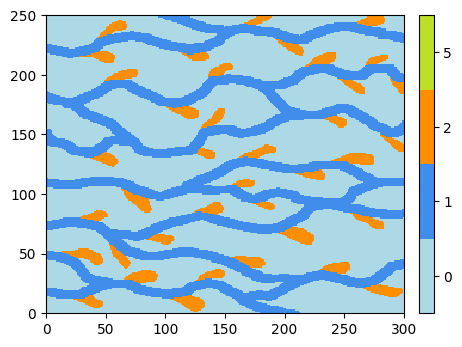

In [23]:
categVal = [0, 1, 2, 5]
categCol = ['lightblue', [x/255. for x in ( 65, 141, 235)], '#ff8f00', plt.get_cmap('viridis')(0.9)]

plt.figure(figsize=(5,5))
gn.imgplot.drawImage2D(im, categ=True, categVal=categVal, categCol=categCol)
plt.show()

Moreover, legend for each category value can be specified via the keyword argument `cticklabels`.

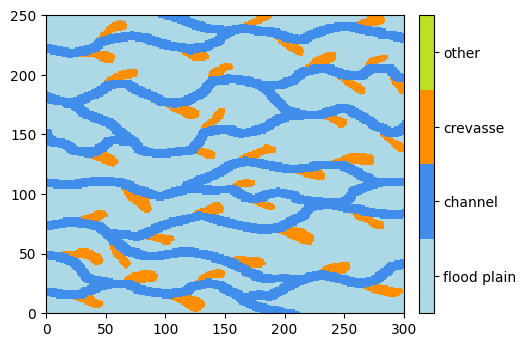

In [24]:
leg = ['flood plain', 'channel', 'crevasse', 'other']
plt.figure(figsize=(5,5))
gn.imgplot.drawImage2D(im, categ=True, categVal=categVal, categCol=categCol, cticklabels=leg)
plt.show()

### Plotting a variable of a point set in a grid
The function `gn.imgplot.get_colors_from_values` allows to get the colors from given values according to color settings as specified in the function `gn.imgplot.drawImage2D`. It is useful to plot a variable of a point set (in a grid) according to the colors used for an image.

Examples with the point set defined above.

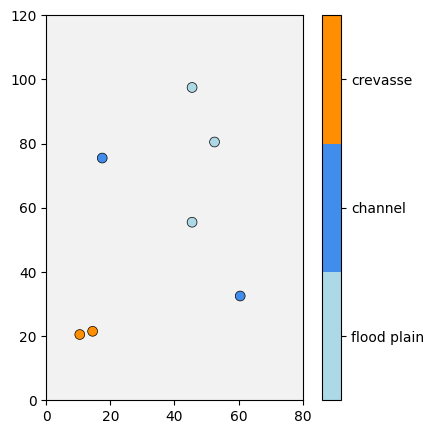

In [25]:
# Define a grid (image without any variable): domain of interest covering the point locations.
nx, ny, nz = 160, 120, 1    # number of cells along each axis
sx, sy, sz = 0.5, 1.0, 1.0 # number of cells along each axis
ox, oy, oz = 0.0, 0.0, 0.0 # number of cells along each axis
im = gn.img.Img(nx=nx, ny=ny, nz=nz, sx=sx, sy=sy, sz=sz, ox=ox, oy=oy, oz=oz, nv=0)

# EXAMPLE - CATEGORICAL CASE
# ==========================
# Colors settings
categVal = [0, 1, 2]
categCol = ['lightblue', [x/255. for x in ( 65, 141, 235)], '#ff8f00']

# Get the colors for values of the variable of index 3 in the point set
ps_col = gn.imgplot.get_colors_from_values(ps.val[3], categ=True, categVal=categVal, categCol=categCol) 

# Legend for colors
leg = ['flood plain', 'channel', 'crevasse']

# Figure
# ------
plt.figure(figsize=(5,5))

# Plot the empty grid (and specify the colors)
#    (note: as no variable is stored in image im, the keyword argument 'plot_empty_grid=True' is not necessary)
gn.imgplot.drawImage2D(im, plot_empty_grid=True, 
                       categ=True, categVal=categVal, categCol=categCol, cticklabels=leg)

# Add points of the point set, with colors according to variable of index 3 (get above)
plt.scatter(ps.x(), ps.y(), marker='o', s=50, color=ps_col, edgecolors='black', linewidths=0.5)
plt.show()


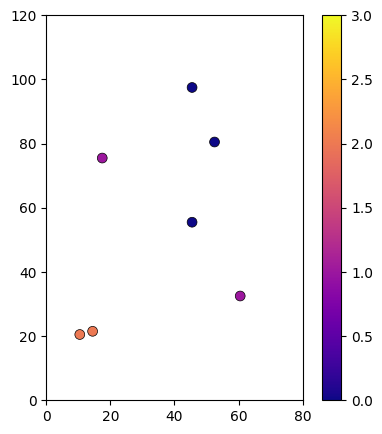

In [26]:
# EXAMPLE - CONTINUOUS CASE
# =========================
# Colors settings
cmap='plasma'
vmin, vmax = 0, 3

# Get the colors for values of the variable of index 3 in the point set
ps_col = gn.imgplot.get_colors_from_values(ps.val[3], cmap=cmap, vmin=vmin, vmax=vmax) 

# Figure
# ------
plt.figure(figsize=(5,5))

# Plot the empty grid (and specify the colors)
gn.imgplot.drawImage2D(im, plot_empty_grid=True, cmap=cmap, vmin=vmin, vmax=vmax)

# Add points of the point set, with colors according to variable of index 3 (get above)
plt.scatter(ps.x(), ps.y(), marker='o', s=50, color=ps_col, edgecolors='black', linewidths=0.5)
plt.show()


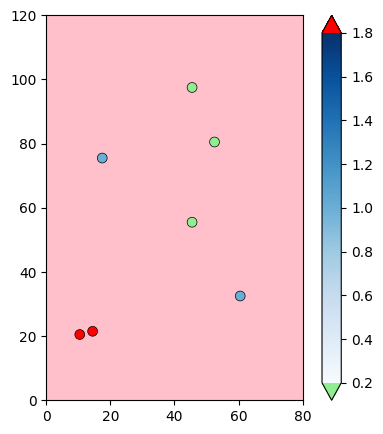

In [27]:
# EXAMPLE - CONTINUOUS CASE WITH CUSTOM CMAP (advanced)
# ==========================================
# Colors settings
cmap = gn.customcolors.custom_cmap(
        [plt.get_cmap('Blues')(x) for x in np.linspace(0,1,256)], ncol=256, 
        cunder='lightgreen', cover='red', cbad='pink') # cbad for nan (missing) value
vmin, vmax = 0.2, 1.8

# Get the colors for values of the variable of index 3 in the point set
ps_col = gn.imgplot.get_colors_from_values(ps.val[3], cmap=cmap, vmin=vmin, vmax=vmax) 

# Figure
# ------
plt.figure(figsize=(5,5))

# Plot the empty grid (and specify the colors)
gn.imgplot.drawImage2D(im, plot_empty_grid=True, cmap=cmap, vmin=vmin, vmax=vmax, colorbar_extend='both')

# Add points of the point set, with colors according to variable of index 3 (get above)
plt.scatter(ps.x(), ps.y(), marker='o', s=50, color=ps_col, edgecolors='black', linewidths=0.5)
plt.show()

## 8. Plotting an image in 3D

Plotting in 3D is more tedious, however, some functions are provided in the module `geone.imgplot3d`. These functions are based on `pyvista`. Some examples are given below as illustration.

In [28]:
import pyvista as pv
pv.set_jupyter_backend('static') # to get static plots within the jupyter notebook

In [29]:
# Load a 3D image
data_dir='data'
filename = os.path.join(data_dir, 'ti_3d.txt')
im = gn.img.readImageTxt(filename)
im

*** Img object ***
name = 'data/ti_3d.txt'
(nx, ny, nz) = (100, 90, 80) # number of cells along each axis
(sx, sy, sz) = (1.0, 1.0, 1.0) # cell size (spacing) along each axis
(ox, oy, oz) = (0.5, 0.5, 0.5) # origin (coordinates of bottom-lower-left corner)
nv = 1  # number of variable(s)
varname = ['data']
val: (1, 80, 90, 100)-array
*****

In [30]:
# Get the values taken by all the variables in the image
im.get_unique()

array([1., 2., 3.])

### 3D plots 
The following functions can be used:

- `geone.imgplot3d.drawImage3D_volume`: 3D plot of *volumes* (smooth interpolation on the vertex of the cells)
- `geone.imgplot3d.drawImage3D_surface`: 3D plot of *surfaces* (values at cells are plotted)
- `geone.imgplot3d.drawImage3D_slice`: 3D plot of *slices* (planes)

### Remark
The figures are generated by using the package `pyvista`. 

In a notebook, the *plotter* is automatically set in *off screen* mode. To force a pop-up window with an interactive figure in a notebook see the second cell below (uncomment the first line and run the cell).

The camera position `cpos` can be specified, it consists of a list of three 3-tuples (`None` for default), `cpos=[camera_location, focus_point, viewup_vector]`, with

- `camera_location`: (tuple of length 3) camera location ("eye")
- `focus_point`    : (tuple of length 3) focus point
- `viewup_vector`  : (tuple of length 3) viewup vector (vector attached to the "head" and pointed to the "sky"), in principle: *(focus_point - camera_location)* is orthogonal to *viewup_vector*

### 3D plot, type "volume" (function `geone.imgplot3d.drawImage3D_volume`)

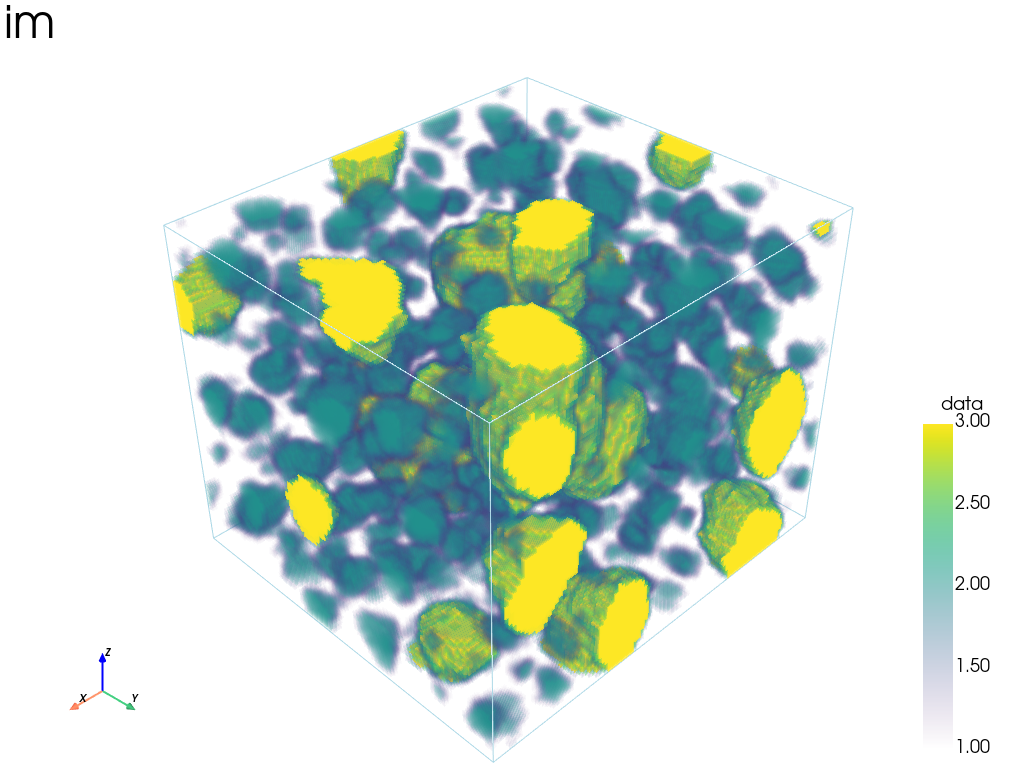

In [31]:
# figure in off screen mode
gn.imgplot3d.drawImage3D_volume(im, scalar_bar_kwargs={'vertical':True}, text='im')

In [32]:
%%script false --no-raise-error # skip this cell! (comment this line to run the cell)

pp = pv.Plotter(notebook=False) # open a plotter and specifying 'notebook=False'
gn.imgplot3d.drawImage3D_volume(im, plotter=pp, scalar_bar_kwargs={'vertical':True}, text='im')
cpos = pp.show(return_cpos=True) # open a pop-up window (interactive plot),
                                 # after closing the pop-up window, the position of the camera is 
                                 # retrieved in output (and may be used for further plot).

### 3D plot, type "surface" (function `geone.imgplot3d.drawImage3D_surface`)

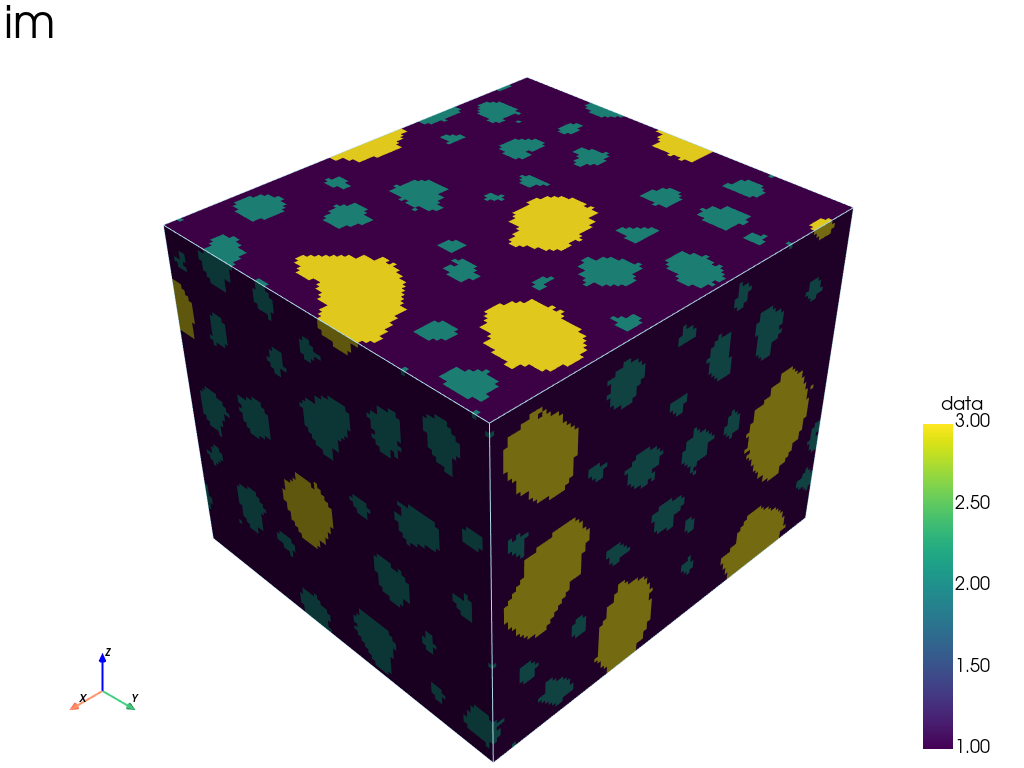

In [33]:
gn.imgplot3d.drawImage3D_surface(im, scalar_bar_kwargs={'vertical':True}, text='im')

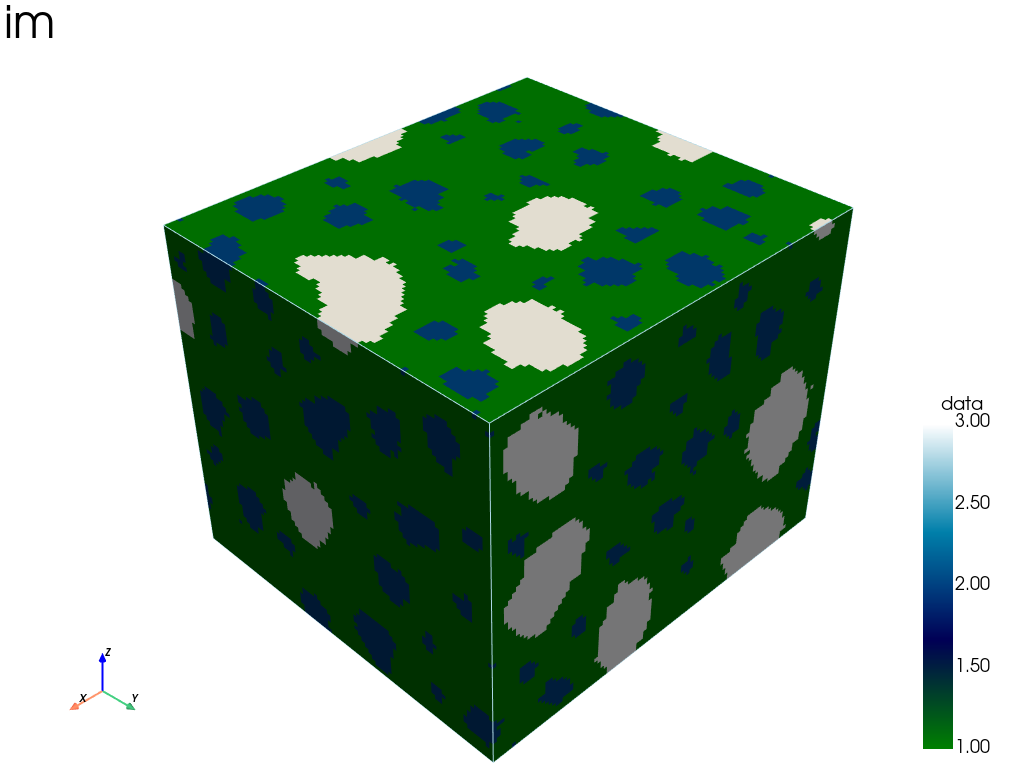

In [34]:
# Specifying another color map
gn.imgplot3d.drawImage3D_surface(im, cmap='ocean', scalar_bar_kwargs={'vertical':True}, text='im')

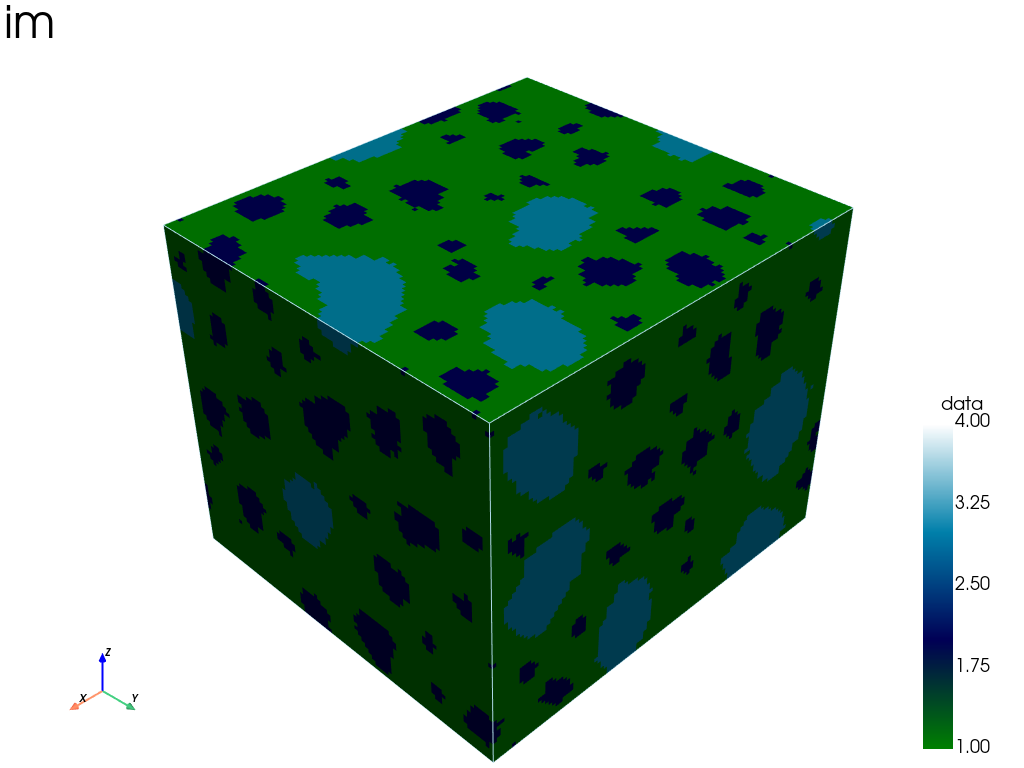

In [35]:
# Specifying color map, and min / max values
gn.imgplot3d.drawImage3D_surface(im, cmap='ocean', cmin=1, cmax=4,  
                                 scalar_bar_kwargs={'vertical':True}, text='im')

**Remark.** Specifying the color map (`cmap`) and min. / max. values (`cmin`, `cmax`) is also possible with the function `geone.imgplot3d.drawImage3D_volume`; however, with the function `geone.imgplot3d.drawImage3D_volume`, if `cmin` is less than the minimal value displayed (or `cmax` is greater than the maximal value displayed), the colors of the values in the grid do not match the scalar bar (issue with `pyvista.add_volume` ?)!

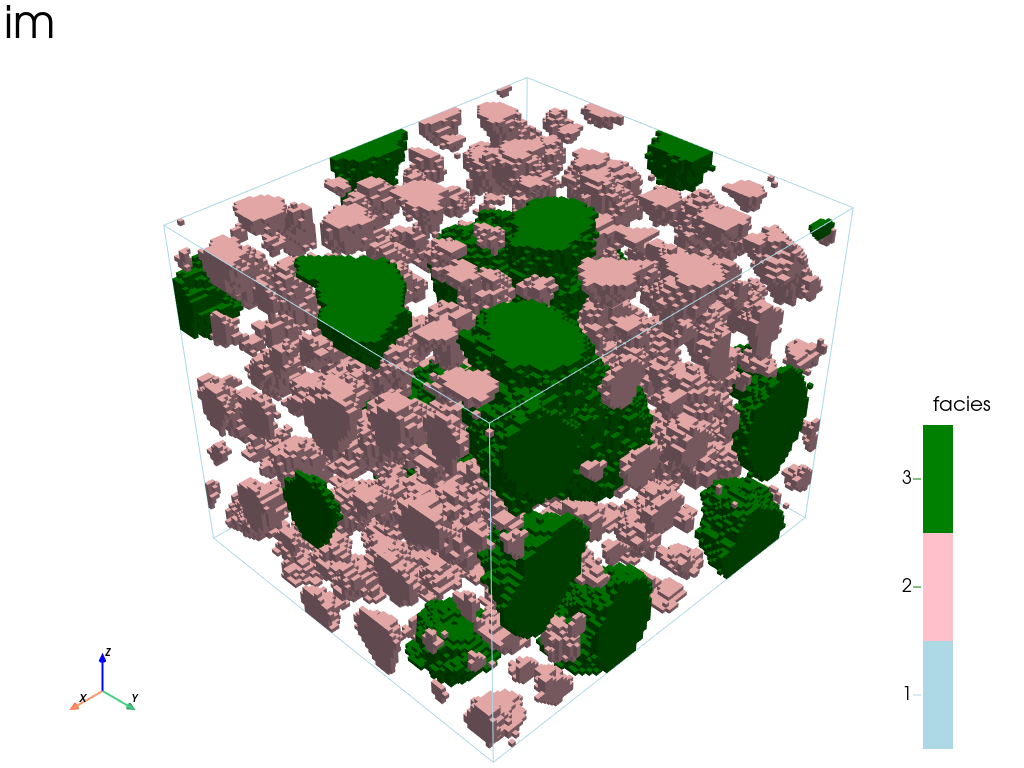

In [36]:
# Customize the output: 
#    - set mode in "categorical variable" (categ=True), and
#        - specify list of category values (categVal)
#        - specify color for each category value (categCol)
#        - specify which categories are "active" for display (categActive)
#    - set title for the scalar bar
#    - ...
categVal = [1, 2, 3] # list of category values 
categCol = ['lightblue', 'pink', 'green'] # colors for each category / facies
gn.imgplot3d.drawImage3D_surface(
    im, 
    categ=True,
    categVal=categVal,
    categCol=categCol,
    categActive=[False, True, True], # display only category value (in categVal) with True
    alpha=1.0, # transparency (alpha channel)
    scalar_bar_kwargs={'title':'facies', 'title_font_size':20, 'vertical':True},
    text='im'
)

### 3D plot, type "slice" (function `geone.imgplot3d.drawImage3D_slice`)

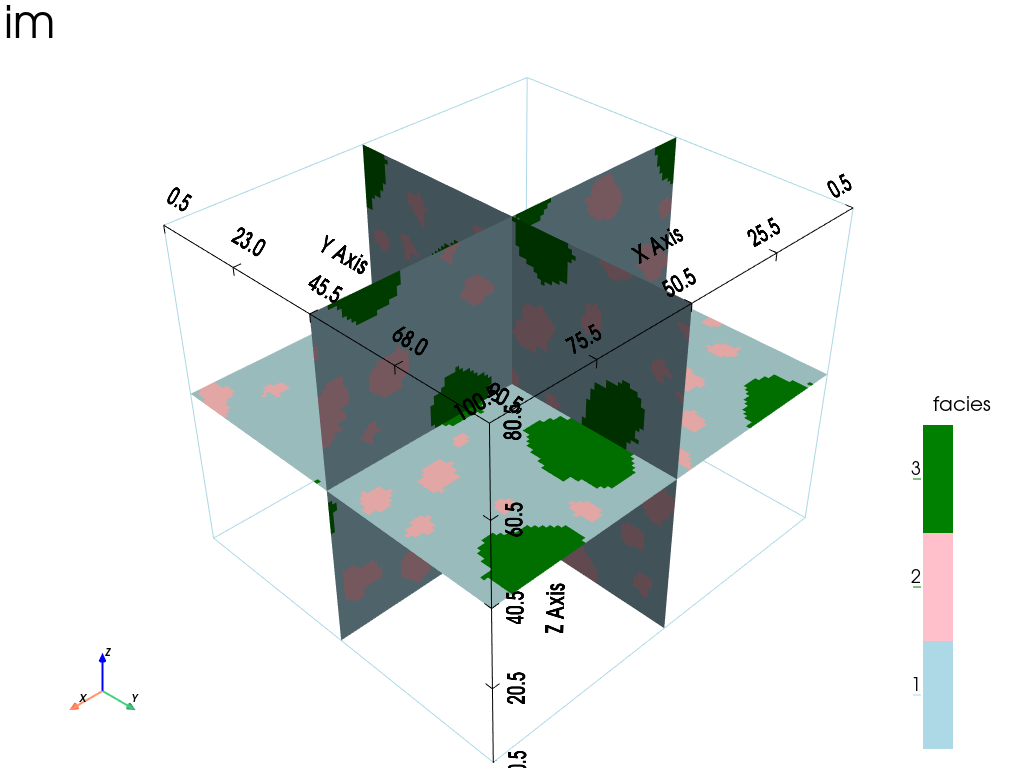

In [37]:
# Slices orthogonal to the axes, going through the center of the images
cx = im.ox + 0.5 * im.nx * im.sx # center along x
cy = im.oy + 0.5 * im.ny * im.sy # center along y
cz = im.oz + 0.5 * im.nz * im.sz # center along z

gn.imgplot3d.drawImage3D_slice(
    im, 
    slice_normal_x=cx, 
    slice_normal_y=cy, 
    slice_normal_z=cz,
    categ=True,
    categVal=categVal,
    categCol=categCol,
    # categActive=[True, True, True], # by default, every category value in categVal is displayed
    show_bounds=True,   # add bounds (axis with graduation)
    scalar_bar_kwargs={'title':'facies', 'title_font_size':20, 'vertical':True},
    text='im'
)

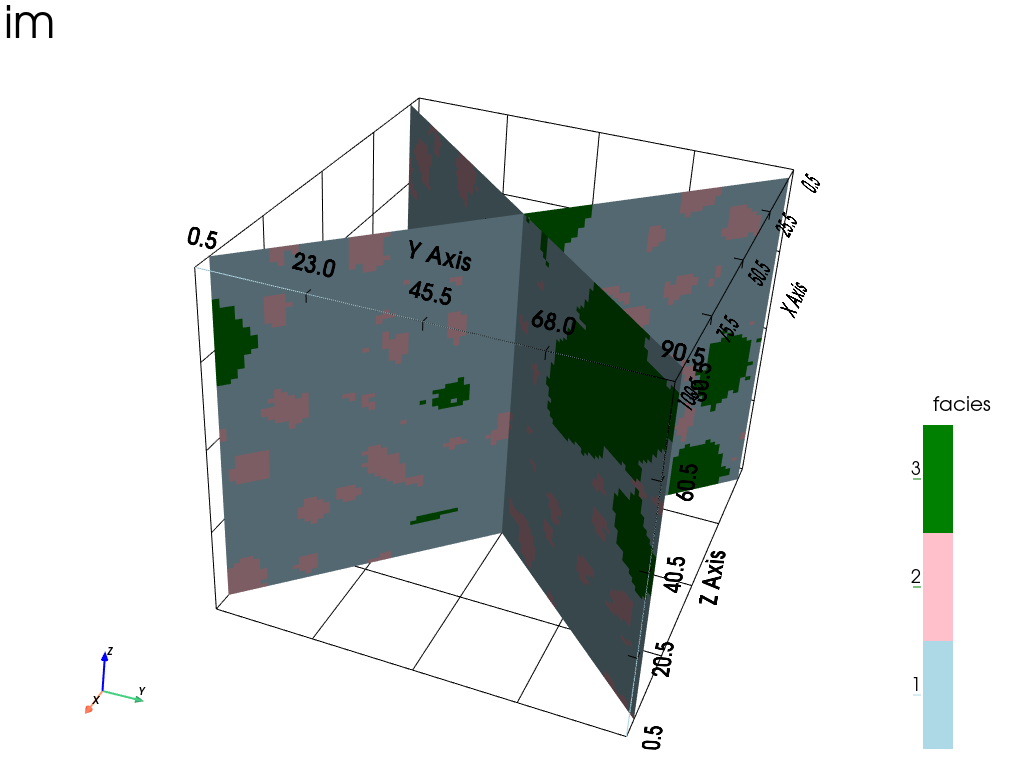

In [38]:
# Custom slices
s0 = ((1,  1, 0), (cx, cy, cz))   # (v, p): orthogonal to v and passing through the point p
s1 = ((1, -1, 0), (cx, cy, cz)) 
gn.imgplot3d.drawImage3D_slice(
    im, 
    slice_normal_custom=[s0, s1], # set the slices
    categ=True,
    categVal=categVal,
    categCol=categCol,
    # categActive=[True, True, True], # by default, every category value in categVal is displayed
    show_bounds=True, bounds_kwargs={'grid':True}, # add bounds with grid
    scalar_bar_kwargs={'title':'facies', 'title_font_size':20, 'vertical':True},
    text='im',
    cpos=[(300., 130., 200.), (cx, cy, cz), (-0.1, -0.1, 1.0)]
)

### Plotting a variable of a point set in a 3D grid
The function `gn.imgplot.get_colors_from_values` allows to get colors from given values according to color settings as specified in the function `gn.imgplot.drawImage2D` or in the functions used to plot a 3D image. It is useful to plot a variable of a point set (in a 3D grid) according to the colors used for a 3D image.

In [39]:
# Define a grid (image without any variable): domain of interest covering the point locations.
nx, ny, nz = 100, 90, 80   # number of cells along each axis
sx, sy, sz = 1.0, 1.0, 1.0 # number of cells along each axis
ox, oy, oz = 0.0, 0.0, 0.0 # number of cells along each axis
im = gn.img.Img(nx=nx, ny=ny, nz=nz, sx=sx, sy=sy, sz=sz, ox=ox, oy=oy, oz=oz, nv=0)

# Define a point set (with 3 points)
varname = ['x', 'y', 'z', 'code'] # list of variable names
v = np.array([
    [10.5, 30.5, 10.0, 1], # x, y, z, code: 1st point (point of index 0)
    [20.5, 20.5, 20.0, 2], # x, y, z, code: 2nd point (point of index 1)
    [70.5, 10.5, 70.0, 3]
    ]).T # variable values: (nv, npt)-array

ps = gn.img.PointSet(npt=v.shape[1], nv=v.shape[0], varname=varname, val=v)
ps, ps.val

(*** PointSet object ***
 name = ''
 npt = 3 # number of point(s)
 nv = 4  # number of variable(s) (including coordinates)
 varname = ['x', 'y', 'z', 'code']
 val: (4, 3)-array
 *****,
 array([[10.5, 20.5, 70.5],
        [30.5, 20.5, 10.5],
        [10. , 20. , 70. ],
        [ 1. ,  2. ,  3. ]]))

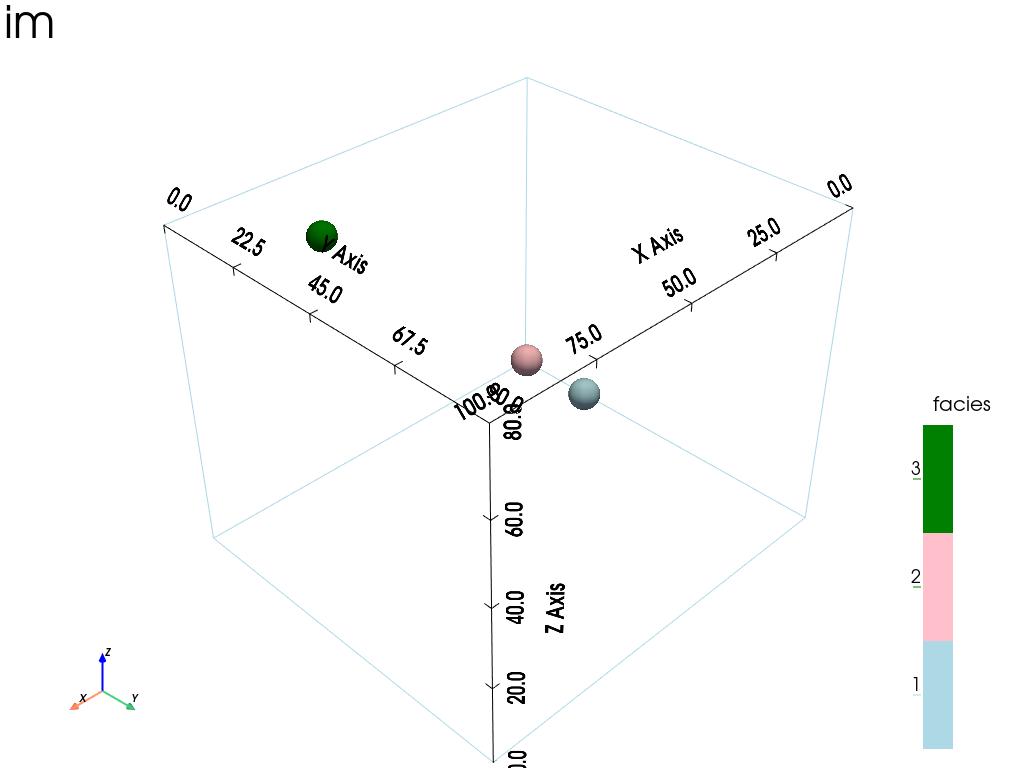

In [40]:
# EXAMPLE - CATEGORICAL CASE
# ==========================
# Colors settings
categVal = [1, 2, 3] # list of category values 
categCol = ['lightblue', 'pink', 'green'] # colors for each category / facies

# Get the colors for values of the variable of index 3 in the point set
ps_col = gn.imgplot.get_colors_from_values(ps.val[3], categ=True, categVal=categVal, categCol=categCol) 

# Set points to be plotted
points = pv.PolyData(ps.val[:3].T) # position of the points
points['colors'] = ps_col # colors for the points

# Plot
pp = pv.Plotter()
# Plot the empty grid (and specify the colors)
gn.imgplot3d.drawImage3D_empty_grid(
    im, 
    plotter=pp,
    categ=True, categVal=categVal, categCol=categCol,
    show_bounds=True,   # add bounds (axis with graduation)
    scalar_bar_kwargs={'title':'facies', 'title_font_size':20, 'vertical':True},
    text='im',
    cpos=[(300., 130., 200.), (cx, cy, cz), (-0.1, -0.1, 1.0)]
)

# Add points
pp.add_mesh(points, rgb=True, point_size=32., render_points_as_spheres=True)

pp.show()

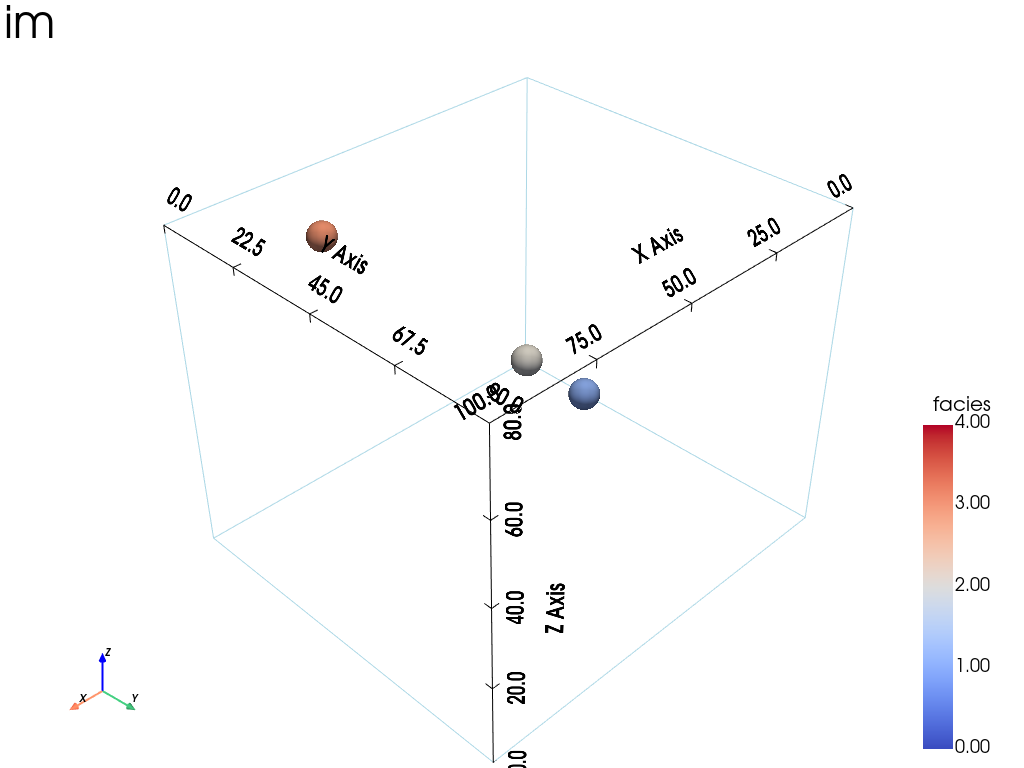

In [41]:
# EXAMPLE - CONTINUOUS CASE
# =========================
# Colors settings
cmap='coolwarm' # color map
cmin, cmax = 0.0, 4.0 # min, max values

# Get the colors for values of the variable of index 3 in the point set
ps_col = gn.imgplot.get_colors_from_values(ps.val[3], cmap=cmap, cmin=cmin, cmax=cmax) 

# Set points to be plotted
points = pv.PolyData(ps.val[:3].T) # position of the points
points['colors'] = ps_col # colors for the points

# Plot
pp = pv.Plotter()
# Plot the empty grid (and specify the colors)
gn.imgplot3d.drawImage3D_empty_grid(
    im, 
    plotter=pp,
    cmap=cmap, cmin=cmin, cmax=cmax,
    show_bounds=True,   # add bounds (axis with graduation)
    scalar_bar_kwargs={'title':'facies', 'title_font_size':20, 'vertical':True},
    text='im',
    cpos=[(300., 130., 200.), (cx, cy, cz), (-0.1, -0.1, 1.0)]
)

# Add points
pp.add_mesh(points, rgb=True, point_size=32., render_points_as_spheres=True)

pp.show()